<a href="https://colab.research.google.com/github/Juan-5725/Alura-Telecom-version-1/blob/main/al_11_Alura_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [27]:
import requests
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Normalizar los datos
datos_telecom = pd.json_normalize(data)
datos_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
# Verificar los tipos de datos
for col in datos_telecom.columns:
  print(f'{col}: {datos_telecom[col].nunique()}')
  if datos_telecom[col].nunique() < 50:
    print(datos_telecom[col].unique())
    print('-' * 50)

customerID: 7267
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer.gender: 2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet.OnlineSecurity: 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
internet.OnlineBackup: 3
['Yes' 'No' 'No internet service']
--------------------------------------------------
internet.DeviceProtecti

In [6]:
print(f'Cantidad de datos duplicados: {datos_telecom.duplicated().sum()}')

Cantidad de datos duplicados: 0


In [7]:
datos_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [8]:
#Valores vacios
datos_telecom.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


# Transformar los datos

In [9]:
# Cambiar a tipo número
datos_telecom['account.Charges.Total'] = pd.to_numeric(datos_telecom['account.Charges.Total'], errors='coerce')
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [10]:
# Eliminar filas con datos vacios
datos_telecom = datos_telecom[datos_telecom['Churn'].str.strip() != '']
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [11]:
# Agregar una columna cuentas diarias
datos_telecom['cuentas_diarias'] = datos_telecom['account.Charges.Monthly'] / 30
datos_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


# Distribución evasión

In [12]:
datos_telecom.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [13]:
datos_telecom['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Tasa de evasión
cantidad_evasion = datos_telecom['Churn'].value_counts().reset_index()
cantidad_evasion.columns = ['Estado', 'Cantidad']

fig_pie = px.pie(cantidad_evasion,
                  values='Cantidad',
                  names='Estado',
                  title='Distribución de Clientes: Retención vs Evasión',
                  color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'},
                  hole=0.6)

fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

In [15]:
# Evasión por género
genero = px.histogram(datos_telecom,
                          x='customer.gender',
                          color='Churn',
                          barmode='group',
                          title='Distribución de la Evasión por Género',
                          labels={'customer.gender': 'Género', 'count': 'Cantidad'},
                          color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'},
                          text_auto=True)

genero.update_layout(
    xaxis_title="Género",
    yaxis_title="Cantidad de Clientes",
)

genero.show()

In [16]:
tipo_contrato = px.histogram(datos_telecom,
                            x='account.Contract',
                            color='Churn',
                            barmode='group',
                            title='Distribución de Evasión por Tipo de Contrato',
                            labels={'account.Contract': 'Tipo de Contrato', 'count': 'Cantidad'},
                            color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'},
                            text_auto=True,
                            category_orders={'account.Contract': ['Month-to-month', 'One year', 'Two year']})

tipo_contrato.update_layout(
    xaxis_title="Tipo de Contrato",
    yaxis_title="Cantidad de Clientes",
)

tipo_contrato.show()

In [17]:
# Distribución por evasión
tiempo_evasion = px.histogram(datos_telecom,
                        x='customer.tenure',
                        color='Churn',
                        nbins=20,
                        title='Distribución del Tiempo de Contratación (meses)',
                        labels={'customer.tenure': 'Meses de contratación',
                               'count': 'Número de clientes'},
                        color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'})

tiempo_evasion.update_layout(
    xaxis_title="Tipo de Contrato",
    yaxis_title="Cantidad de Clientes",
)

tiempo_evasion.show()

In [18]:
fig_box = px.box(datos_telecom,
                 x='Churn',
                 y='customer.tenure',
                 title='Comparación de Tiempo de Permanencia',
                 labels={'customer.tenure': 'Meses de contratación',
                        'Churn': 'Estado del cliente'},
                 color='Churn',
                 color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'})

fig_box.show()

In [19]:
pagos_evasion = datos_telecom.groupby(['account.PaymentMethod', 'Churn']).size().reset_index(name='count')
pagos_total = datos_telecom.groupby('account.PaymentMethod').size().reset_index(name='total')
pagos_evasion = pagos_evasion.merge(pagos_total, on='account.PaymentMethod')
pagos_evasion['percentage'] = (pagos_evasion['count'] / pagos_evasion['total'] * 100).round(2)

fig_payment = px.bar(pagos_evasion[pagos_evasion['Churn'] == 'Yes'],
                     x='account.PaymentMethod',
                     y='percentage',
                     title='Tasa de Evasión por Método de Pago',
                     labels={'account.PaymentMethod': 'Método de Pago',
                            'percentage': 'Tasa de Evasión (%)'},
                     color='percentage',
                     color_continuous_scale='Reds',
                     text='percentage')

fig_payment.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig_payment.update_layout(
    xaxis_title="Método de Pago",
    yaxis_title="Tasa de Evasión (%)",
    xaxis_tickangle=-45
)
fig_payment.show()

In [20]:
# Jerarquía de evasión
sunburst_data = datos_telecom.groupby(['account.Contract', 'internet.InternetService', 'Churn']).size().reset_index(name='count')

fig_sunburst = px.sunburst(sunburst_data,
                           path=['account.Contract', 'internet.InternetService', 'Churn'],
                           values='count',
                           title='Distribución Jerárquica de Evasión por Contrato y Servicio de Internet',
                           color='Churn',
                           color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4', '(?)': '#E0E0E0'})

fig_sunburst.update_layout(
    width=800,
    height=800
)
fig_sunburst.show()

# Conteo de evasión por variables numéricas

In [21]:
# Cargos totales
fig_total = px.box(datos_telecom,
                   x='Churn',
                   y='account.Charges.Total',
                   title='Distribución de Cargos Totales por Estado de Evasión',
                   labels={'account.Charges.Total': 'Cargos Totales ($)',
                          'Churn': 'Cliente canceló'},
                   color='Churn',
                   color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'})

fig_total.show()

In [22]:
# Box plot de cargos mensuales
fig_monthly = px.box(datos_telecom,
                     x='Churn',
                     y='account.Charges.Monthly',
                     title='Distribución de Cargos Mensuales por Estado de Evasión',
                     labels={'account.Charges.Monthly': 'Cargo Mensual ($)',
                            'Churn': 'Cliente canceló'},
                     color='Churn',
                     color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'})

fig_monthly.show()

In [23]:
# Box plot de tiempo de contrato
fig_tenure = px.box(datos_telecom,
                    x='Churn',
                    y='customer.tenure',
                    title='Distribución del Tiempo de Contrato por Estado de Evasión',
                    labels={'customer.tenure': 'Tiempo de Contrato (meses)',
                           'Churn': 'Cliente canceló'},
                    color='Churn',
                    color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'})

fig_tenure.show()

In [24]:
# Histograma de cargos totales
fig_hist_total = px.histogram(datos_telecom,
                              x='account.Charges.Total',
                              color='Churn',
                              nbins=30,
                              title='Distribución de Cargos Totales: Clientes Activos vs Evasión',
                              labels={'account.Charges.Total': 'Cargos Totales ($)',
                                     'count': 'Número de Clientes'},
                              color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'},
                              opacity=0.7,
                              barmode='overlay')

fig_hist_total.show()

In [25]:
# Relación entre tiempo y gasto total
fig_scatter = px.scatter(datos_telecom,
                          x='customer.tenure',
                          y='account.Charges.Total',
                          color='Churn',
                          title='Relación: Tiempo de Contrato vs Gasto Total',
                          labels={'customer.tenure': 'Tiempo de Contrato (meses)',
                                 'account.Charges.Total': 'Gasto Total ($)'},
                          color_discrete_map={'Yes': '#FF6B6B', 'No': '#4ECDC4'},
                          opacity=0.6,
                          hover_data=['account.Charges.Monthly'])

fig_scatter.show()

# Correlaciones

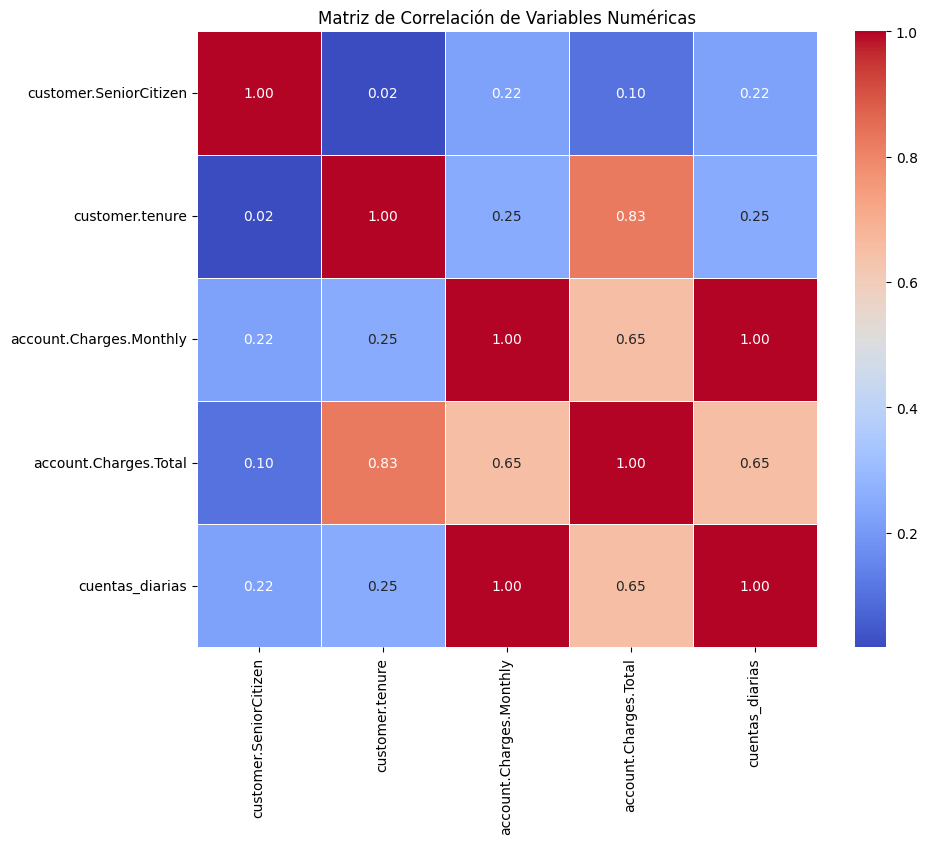

In [28]:
numerical_cols = datos_telecom.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Conclusiones

Aproximadamente el 26.5% de los clientes cancelaron el servicio,lo que indica la necesidad de estrategias de retención.

Los clientes con contratos mes a mes tienen una tasa de evasión considerablemente más alta en comparación con aquellos que tienen contratos de uno o dos años. Esto sugiere que los contratos a largo plazo son un factor clave para la retención.

Los clientes que cancelan tienden a tener un tiempo de permanencia mucho más corto (meses de contratación) en comparación con los clientes que permanecen. La evasión es particularmente alta en los primeros meses de servicio.

El cheque electrónico es el método de pago asociado con la tasa de evasión más alta. Esto podría indicar problemas de satisfacción o experiencia con este método o con los clientes que lo utilizan.

# Recomendaciones

Incentivar Contratos a Largo Plazo: Ofrecer descuentos atractivos, beneficios adicionales o tarifas más competitivas a los clientes que opten por contratos de uno o dos años en lugar de mes a mes.

Monitoreo Proactivo: Identificar a los clientes con menos de 6-12 meses de antigüedad que muestren señales de insatisfacción o que estén en segmentos de alto riesgo (contratos mes a mes, fibra óptica, cargos mensuales altos).

Ofertas de Retención para Clientes Recientes: Si se detecta un riesgo de abandono en los primeros meses, ofrecer incentivos personalizados para alentar su permanencia.

Investigar Problemas con Cheques Electrónicos: Realizar encuestas o análisis de causa raíz para entender por qué el método de pago por cheque electrónico está asociado con una alta tasa de abandono. Podría ser un problema de usabilidad, confiabilidad o simplemente un indicador de un tipo de cliente más propenso al abandono.

Claridad en la Oferta: Asegurarse de que los clientes de fibra óptica comprendan completamente los términos de su servicio y los beneficios que justifican los cargos mensuales, especialmente aquellos con contratos mes a mes. Podría haber una desconexión entre la expectativa y la realidad del servicio o su costo.